# Hypothetical practical exercise by Dr. BENGHALEM Abdelhadi

let's assume you have a dataset with relevant customer information and a binary target variable for churn (1 for churned, 0 for not churned).

CustomerID	Age	  income         TotalSpend	      Churn
1	        35	  55000	           2000                 0
2	        45	  75000	           4000                0
3	        30	  40000	            1500                1
4	        50	  85000	            6000                0
5	        25	  30000	            800                1
6	        60	  100000	        8000                0
7	        40	  60000	            3500                0
8	        28	  32000	            1200                1
9	        55	  90000	            7000                0
10	        32	  42000	            1000               1

In this example, we have the following columns:

CustomerID: Unique identifier for each customer.
Age: Age of the customer.
Income: Annual income of the customer.
TotalSpend: Total amount spent by the customer.
Churn: Binary variable indicating whether the customer has churned (1 for churned, 0 for not churned).

## Building a decision tree model for customer churn prediction in R

These lines load the required R packages: rpart for building decision trees and rpart.plot for visualizing the decision tree.

In [11]:
# Load the necessary libraries
library(rpart)  # For building decision trees
library(rpart.plot)  # For plotting the decision tree

This code creates a data frame customer_churn_data from the provided data. It includes columns for CustomerID, Age, Income, TotalSpend, and Churn. This data frame serves as the dataset for the analysis.

In [12]:
# Create a data frame from the provided data
customer_churn_data <- data.frame(
  CustomerID = 1:10,
  Age = c(35, 45, 30, 50, 25, 60, 40, 28, 55, 32),
  Income = c(55000, 75000, 40000, 85000, 30000, 100000, 60000, 32000, 90000, 42000),
  TotalSpend = c(2000, 4000, 1500, 6000, 800, 8000, 3500, 1200, 7000, 1800),
  Churn = c(0, 0, 1, 0, 1, 0, 0, 1, 0, 1)
)

This code randomly splits the data into training and testing sets. It sets a random seed for reproducibility, and it randomly selects 70% of the data for training (train_data) and the remaining 30% for testing (test_data).

In [13]:
# Split the data into training and testing sets
set.seed(123)
sample_index <- sample(1:nrow(customer_churn_data), 0.7 * nrow(customer_churn_data))
train_data <- customer_churn_data[sample_index, ]
test_data <- customer_churn_data[-sample_index, ]


This code builds a decision tree model using the rpart function. It uses the formula Churn ~ Age + Income + TotalSpend, indicating that we want to predict Churn based on Age, Income, and TotalSpend. The method = "class" specifies that this is a classification problem.

In [14]:
# Build the decision tree model
churn_tree <- rpart(Churn ~ Age + Income + TotalSpend, data = train_data, method = "class")

These lines visualize the decision tree using the rpart.plot package. It generates a graphical representation of the decision tree model you built.

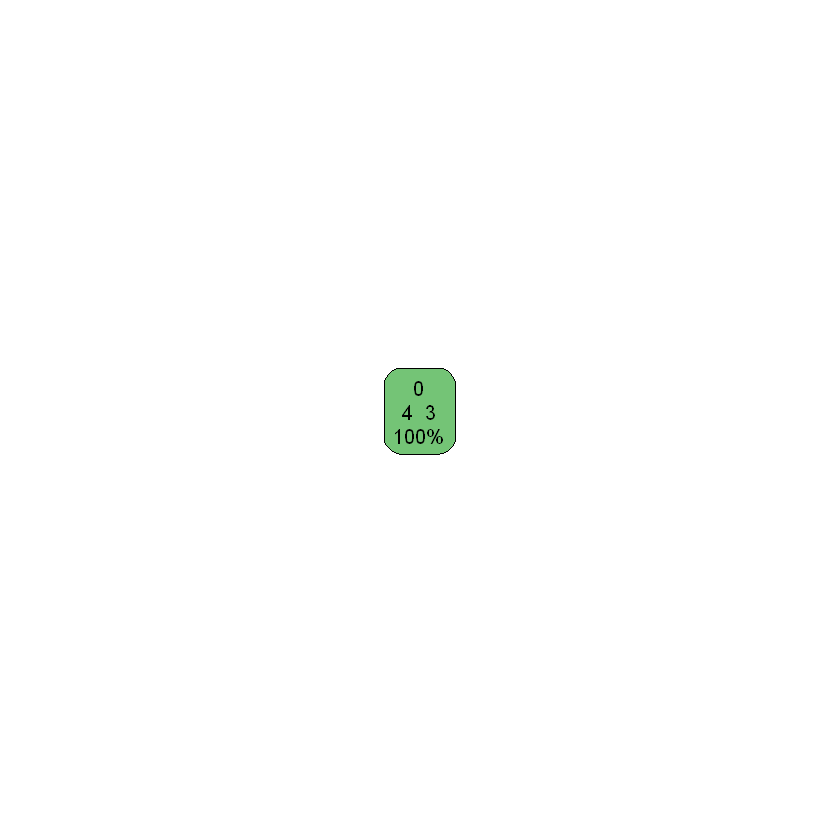

In [15]:
# Visualize the decision tree
rpart.plot(churn_tree, box.palette = "GnBu", type = 4, extra = 101)

Here, we evaluate the decision tree model using the test dataset. We use the predict function to make predictions, create a confusion matrix to assess the model's performance, and calculate the accuracy of the model.

In [16]:
# Evaluate the model using the test dataset
test_predictions <- predict(churn_tree, test_data, type = "class")
confusion_matrix <- table(Actual = test_data$Churn, Predicted = test_predictions)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)

These lines print the confusion matrix and accuracy to the R console, giving you insight into the model's performance.

In [17]:
# Print the confusion matrix and accuracy
print(confusion_matrix)
cat("Accuracy: ", accuracy, "\n")

      Predicted
Actual 0 1
     0 2 0
     1 1 0
Accuracy:  0.6666667 


The accuracy of the model is approximately 0.6667 or 66.67%. This means that the model correctly predicted the outcome for about 66.67% of the cases in the test dataset.

While accuracy is a common metric for evaluating models, it's important to consider the context and specific business goals. In this case, the model's accuracy indicates that it correctly predicted customer churn in two-thirds of the cases.

## Prediction

Create a data frame with the new customer information, similar to what we did earlier:

In [18]:
# Create a data frame with new customer information
new_customer_data <- data.frame(Age = 38, Income = 60000, TotalSpend = 2500)

Use the decision tree model to predict churn for the new customer

In [19]:
# Use the decision tree model to predict churn
predicted_churn <- predict(churn_tree, new_customer_data, type = "class")

# Print the prediction
cat("Predicted Churn (1 for churned, 0 for not churned): ", predicted_churn, "\n")


Predicted Churn (1 for churned, 0 for not churned):  1 


For the new customer with an age of 38, an income of 60,000 da, and a total spend of 2,500 da, the model predicts a churn status of 1, which means that it predicts this customer is likely to churn.